# Image Cryptography using Chaos Maps

**What are chaos maps?**
<br>
Chaos-based image encryption, commonly known as a chaotic system, is an approach to encrypting an image that involves chaotic maps, which are rows of random numbers generated by a mathematical calculation with certain initial values.

Chaotic systems are a simple sub-type of nonlinear dynamical systems. They may contain very few interacting parts and these may follow very simple rules, but these systems all have a very sensitive dependence on their **initial conditions**. Despite their deterministic simplicity, over time these systems can produce totally unpredictable and wildly divergent (aka, chaotic) behavior.

<br>

**Why Chaos Maps for encryption?**

Chaos Maps are widely used in image encryption for many reasons,
1. It is sensitive to initial values,
2. The resulting numbers are random and,
3. There are no patterns in the random number sequence.

Traditional encrypting mechanisms AES and RSA exhibit some drawbacks
and weakness in the encryption of digital images 
  and high computing

*   Large computational time for large images
*   High computing power for large images
Consequently, there might be better techniques for image encryption.

A few chaos based algorithms provide a good combination of speed, high security complexity, low computational overheads Moreover, **certain** chaos-based and other dynamical systems based algorithms have many important properties such as 

*   sensitive dependence on initial parameters
*   pseudorandom properties
*   ergodicity
*   non periodicity

In [1]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2 
import random
from math import log
from google.colab.patches import cv2_imshow
from tqdm import tqdm

#### Function to get Image matrix from Pixel Access object

In [2]:
def getImageMatrix(imageName):
    im = Image.open(imageName) 
    pix = im.load()
    color = 1
    if type(pix[0,0]) == int:
      color = 0
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix, image_size[0], image_size[1],color

# Arnold Cat Map

Arnold's Cat Map is a chaotic map often used for pixel manipulation. It randomizes the pixel positions in an image by stretching and folding the image. When an optimal number of iterations of the transformation is applied on the image, the resulting image becomes incomprehensible and hence encrypted.


For this implementation the transform applied on the image is:
R( [x,y] ) = [ (x + y) mod n, (x + 2y) mod n ] where n is the dimensions of the image.

<br>

When the transformation is repeated enough times, the original image will reappear.
The number of iterations 'n' at which the original image will reappear is given by these rules of thumb:
Here 'd' is the dimension of the square image:

1.   if d =  2.(5^i) for i >=1, n = 3*d
2.   if d = (5^i) for i >=1, n = 2*d
3.   if d = 6.(5^i) for i>=1, n = 2*d
4.   else n <= 12*d / 7

This periodicity forms the crux of the encryption process. Here key is the number of iterations of transformations initially applied to get the encrypted image. n - key is the number of rounds of transformations applied to get the decrypted image.

In [3]:
def ArnoldCatTransform(img, num):
    rows, cols, ch = img.shape
    n = rows
    img_arnold = np.zeros([rows, cols, ch])
    for x in range(0, rows):
        for y in range(0, cols):
            img_arnold[x][y] = img[(x+y)%n][(x+2*y)%n]  
    return img_arnold    

#### Arnold Cat Encryption

In [4]:
def ArnoldCatEncryption(imageName, key):
    img = cv2.imread(imageName)
    for i in range (0,key):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite(imageName.split('.')[0] + "_ArnoldcatEnc.png", img)
    return img

#### Arnold Cat Decryption

In [5]:
def ArnoldCatDecryption(imageName, key):
    img = cv2.imread(imageName)
    rows, cols, ch = img.shape
    dimension = rows
    decrypt_it = dimension
    if (dimension%2==0) and 5**int(round(log(dimension/2,5))) == int(dimension/2):
        decrypt_it = 3*dimension
    elif 5**int(round(log(dimension,5))) == int(dimension):
        decrypt_it = 2*dimension
    elif (dimension%6==0) and  5**int(round(log(dimension/6,5))) == int(dimension/6):
        decrypt_it = 2*dimension
    else:
        decrypt_it = int(12*dimension/7)
    for i in range(key,decrypt_it):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite(imageName.split('_')[0] + "_ArnoldcatDec.png",img)
    return img

In [6]:
image = "naruto"
ext = ".jpg"
key = 20

### Original Image

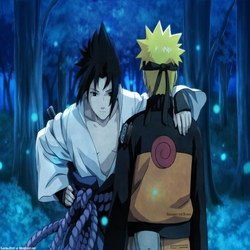

In [7]:
img = cv2.imread(image + ext)
cv2_imshow(img)

### Encryption

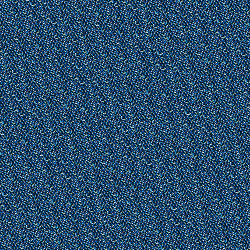

In [8]:
ArnoldCatEncryptionIm = ArnoldCatEncryption(image + ext, key)
cv2_imshow(ArnoldCatEncryptionIm)

### Decryption

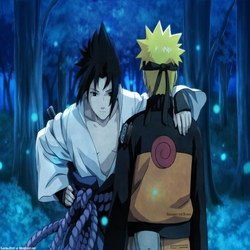

In [9]:
ArnoldCatDecryptionIm = ArnoldCatDecryption(image + "_ArnoldcatEnc.png", key)
cv2_imshow(ArnoldCatDecryptionIm)

## Histogram Analysis


We are doing histogram analysis as it is the most straight-forward methods of illustrating the image encryption quality. A good image encryption method tends to encrypt a plain text image to a random incomprehensible form. Thus a good image encyption technique generates an encrypted image that has a uniformly distributed intensity histogram.

### Original Image

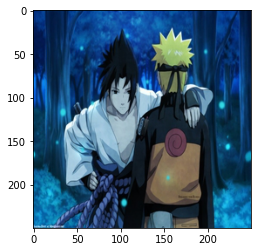

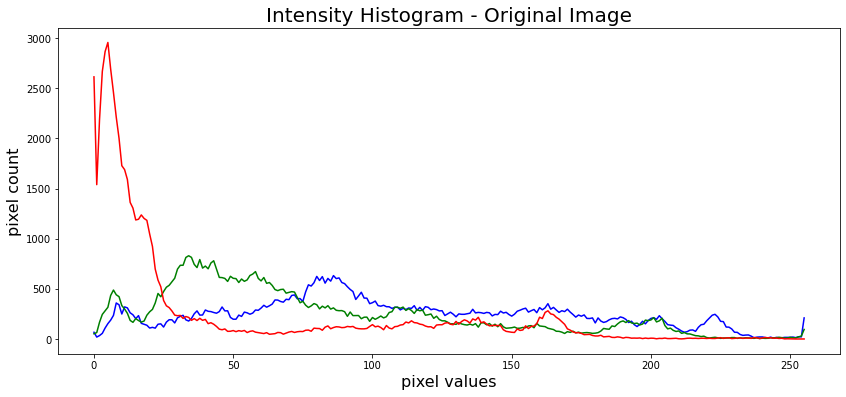

In [10]:
img = cv2.imread(image + ext,1) 
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Original Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

### Encrypted Image

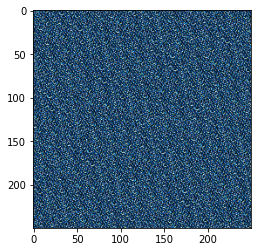

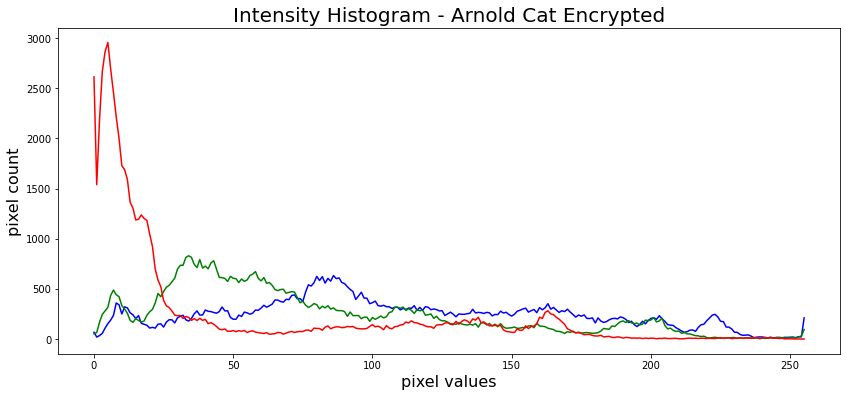

In [11]:
img = cv2.imread(image + "_ArnoldcatEnc.png",1) 
pil_im = Image.open(image + "_ArnoldcatEnc.png", 'r')
imshow(np.asarray(pil_im))

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red') 
plt.title('Intensity Histogram - Arnold Cat Encrypted', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

# Henon Map

The Hénon map, is a discrete-time dynamical system. It is one of the most studied examples of dynamical systems that exhibit chaotic behavior. The Hénon map takes a point (xn, yn) in the plane and maps it to a new point.

<br>

Given initial conditions (x0,y0), a henon map is given by the following equations:
<br>

(Xn+1) = (Yn) + 1 − a.(Xn)

(Yn+1) = b * (Xn)

The map depends on two parameters, a and b, which for the classical Hénon map have values of a = 1.4 and b = 0.3. For the classical values the Hénon map is chaotic. For other values of a and b the map may be chaotic, intermittent, or converge to a periodic orbit.

In [12]:
def dec(bitSequence):
    decimal = 0
    for bit in bitSequence:
        decimal = decimal * 2 + int(bit)
    return decimal

In [13]:
def genHenonMap(dimension, key):
    x = key[0]
    y = key[1]
    sequenceSize = dimension * dimension * 8 #Total Number of bitSequence produced
    bitSequence = []    #Each bitSequence contains 8 bits
    byteArray = []      #Each byteArray contains m( i.e 512 in this case) bitSequence
    TImageMatrix = []   #Each TImageMatrix contains m*n byteArray( i.e 512 byteArray in this case)
    for i in range(sequenceSize):
        xN = y + 1 - 1.4 * x**2
        yN = 0.3 * x

        x = xN
        y = yN

        if xN <= 0.4:
            bit = 0
        else:
            bit = 1

        try:
            bitSequence.append(bit)
        except:
            bitSequence = [bit]

        if i % 8 == 7:
            decimal = dec(bitSequence)
            try:
                byteArray.append(decimal)
            except:
                byteArray = [decimal]
            bitSequence = []

        byteArraySize = dimension*8
        if i % byteArraySize == byteArraySize-1:
            try:
                TImageMatrix.append(byteArray)
            except:
                TImageMatrix = [byteArray]
            byteArray = []
    return TImageMatrix

## Henon Encryption


In [14]:
def HenonEncryption(imageName,key):
    imageMatrix, dimensionX, dimensionY, color = getImageMatrix(imageName)
    dimension = dimensionX + dimensionY
    transformationMatrix = genHenonMap(dimension, key)
    resultantMatrix = []
    for i in range(dimensionX):
        row = []
        for j in range(dimensionY):
            try:
                if color:
                    row.append(tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]))
                else:
                    row.append(transformationMatrix[i][j] ^ imageMatrix[i][j])
            except:
                if color:
                    row = [tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]])]
                else :
                    row = [transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]
        try:    
            resultantMatrix.append(row)
        except:
            resultantMatrix = [row]
    if color:
      im = Image.new("RGB", (dimensionX, dimensionY))
    else: 
      im = Image.new("L", (dimensionX, dimensionY)) # L is for Black and white pixels

    pix = im.load()
    for x in range(dimensionX):
        for y in range(dimensionY):
            pix[x, y] = resultantMatrix[x][y]
    im.save(imageName.split('.')[0] + "_HenonEnc.png", "PNG")

## Henon Decryption

In [15]:
def HenonDecryption(imageNameEnc, key):
    imageMatrix, dimensionX, dimensionY, color = getImageMatrix(imageNameEnc)
    dimension = dimensionX + dimensionY
    transformationMatrix = genHenonMap(dimension, key)
    pil_im = Image.open(imageNameEnc, 'r')
    imshow(np.asarray(pil_im))
    henonDecryptedImage = []
    for i in range(dimensionX):
        row = []
        for j in range(dimensionY):
            try:
                if color:
                    row.append(tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]))
                else:
                    row.append(transformationMatrix[i][j] ^ imageMatrix[i][j])
            except:
                if color:
                    row = [tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]])]
                else :
                    row = [transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]
        try:
            henonDecryptedImage.append(row)
        except:
            henonDecryptedImage = [row]
    if color:
        im = Image.new("RGB", (dimensionX, dimensionY))
    else: 
        im = Image.new("L", (dimensionX, dimensionY)) # L is for Black and white pixels

    pix = im.load()
    for x in range(dimensionX):
        for y in range(dimensionY):
            pix[x, y] = henonDecryptedImage[x][y]
    im.save(imageNameEnc.split('_')[0] + "_HenonDec.png", "PNG")

In [16]:
image = "naruto"
ext = ".jpg"
key = (0.1,0.1)

### Original Image

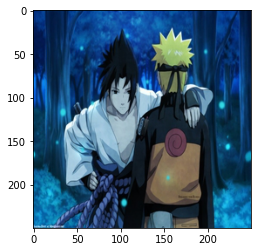

In [17]:
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

### Encryption

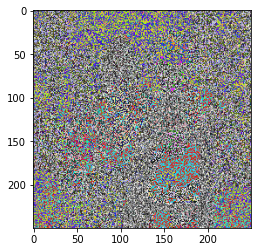

In [18]:
HenonEncryption(image + ext, key)
im = Image.open(image + "_HenonEnc.png", 'r')
imshow(np.asarray(im))

### Decryption

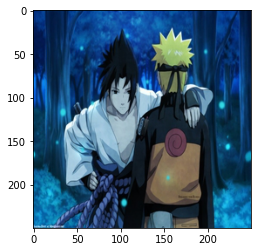

In [19]:
HenonDecryption(image + "_HenonEnc.png", key)
im = Image.open(image + "_HenonDec.png", 'r')
imshow(np.asarray(im))

## Histogram Analysis


### Original Image

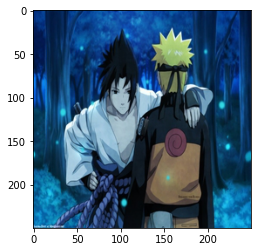

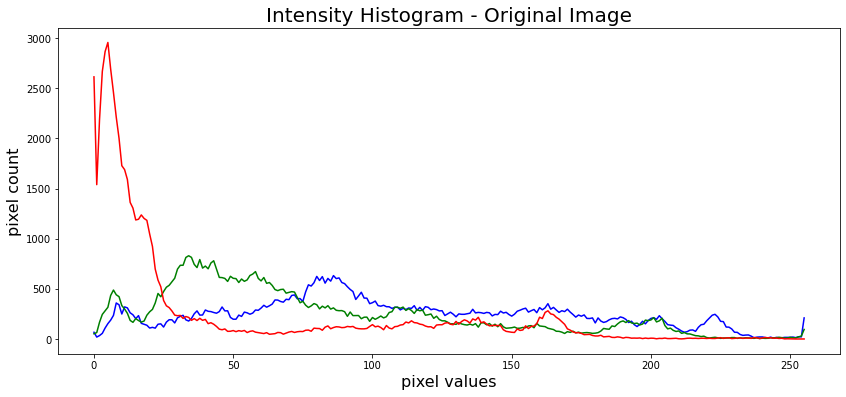

In [20]:
img = cv2.imread(image + ext,1) 
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))
plt.figure(figsize=(14,6))

histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red') 
plt.title('Intensity Histogram - Original Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

### Encrypted Image

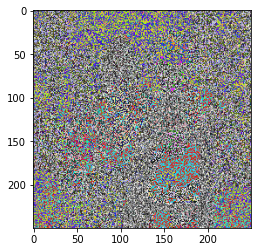

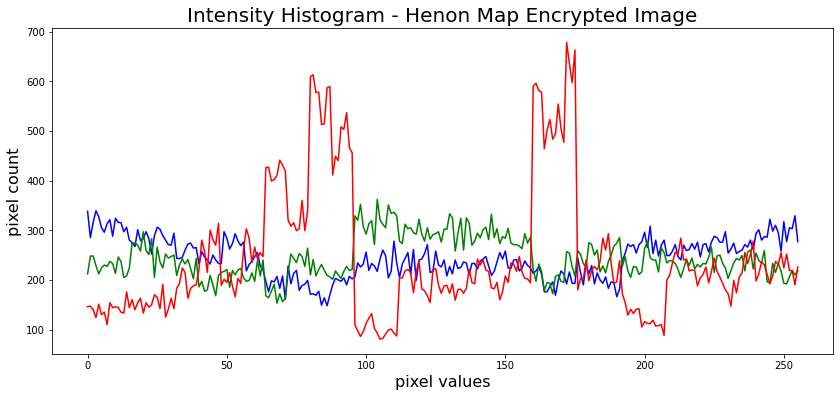

In [21]:
img = cv2.imread(image + "_HenonEnc.png",1) 
pil_im = Image.open(image + "_HenonEnc.png", 'r')
imshow(np.asarray(pil_im))
plt.figure(figsize=(14,6))

histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red') 
plt.title('Intensity Histogram - Henon Map Encrypted Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

# Key Sensitivity

### Original Image

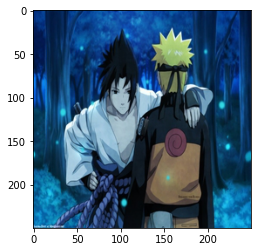

In [22]:
img = cv2.imread(image + ext,1) 
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

## Arnold Cat

Encrypt with key = 20

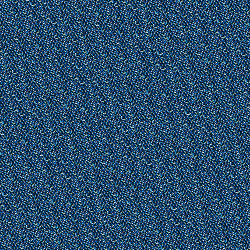

In [23]:
ArnoldCatEncryptionIm = ArnoldCatEncryption(image + ext, 20)
cv2_imshow(ArnoldCatEncryptionIm)

Decrypt with key = 19

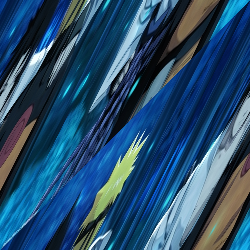

In [24]:
ArnoldCatDecryptionIm = ArnoldCatDecryption(image + "_ArnoldcatEnc.png", 19)
cv2_imshow(ArnoldCatDecryptionIm)

## Henon Maps

Encrypt with key (0.1, 0.1)

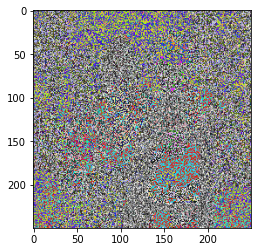

In [25]:
HenonEncryption(image + ext, (0.1, 0.1))
im = Image.open(image + "_HenonEnc.png", 'r')
imshow(np.asarray(im))

Decrypt with the key (0.11, 0.1)

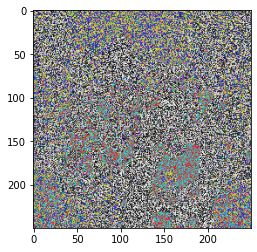

In [26]:
HenonDecryption(image + "_HenonEnc.png", (0.11, 0.1))
im = Image.open(image + "_HenonDec.png", 'r')
imshow(np.asarray(im))

---
---

## Here is an another example of the above cryptography methods using different image.

### Using Arnold Cat Map

In [27]:
image = "lena"
ext = ".jpg"
key = 20

#### Original Image

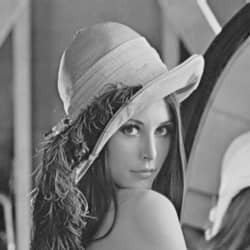

In [28]:
img = cv2.imread(image + ext)
cv2_imshow(img)

#### Encrypted Image

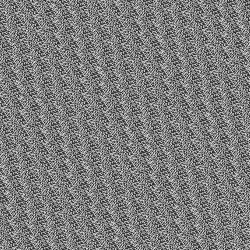

In [29]:
ArnoldCatEncryptionIm = ArnoldCatEncryption(image + ext, key)
cv2_imshow(ArnoldCatEncryptionIm)

#### Decrypted Image

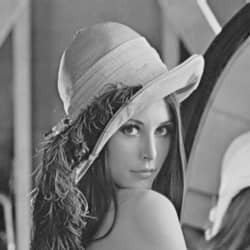

In [30]:
ArnoldCatDecryptionIm = ArnoldCatDecryption(image + "_ArnoldcatEnc.png", key)
cv2_imshow(ArnoldCatDecryptionIm)

### Using Hennon Map

In [31]:
image = "lena"
ext = ".jpg"
key = (0.1, 0.1)

#### Original Image

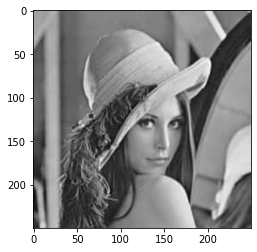

In [32]:
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im), cmap='gray')

#### Encrypted Image

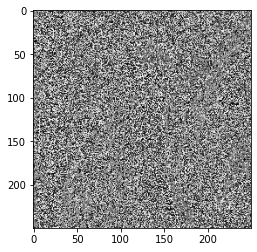

In [33]:
HenonEncryption(image + ext, key)
im = Image.open(image + "_HenonEnc.png", 'r')
imshow(np.asarray(im), cmap='gray')

#### Decrypted Image

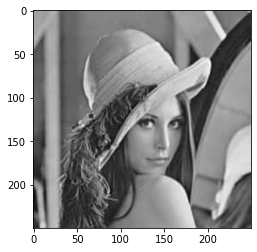

In [34]:
HenonDecryption(image + "_HenonEnc.png", key)
im = Image.open(image + "_HenonDec.png", 'r')
imshow(np.asarray(im), cmap='gray')